# MICROSOFT NEW MOVIES STUDIO ANALYSIS

# overview

in my data project i am analysing the profitable movie genre with the highest viewing and rate to help a microsoft company to be able to get actionable insights to decide on what movies to create.

## Business Understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


# Objectives 

1. Questions
* What genre is making highest profit
* what genre runtime is making profit
* 


# Loading Libraries 

In [198]:
#importing pandas,numpy and matplotlib libraries as alias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq
import seaborn as sns
%matplotlib inline

# Reading Files

In [ ]:
#reading all files to use 
#bomgros = pd.read_csv("data/bom.movie_gross.csv") #rename title
tmdb_movi = pd.read_csv("data/tmdb.movies.csv") # original_title
movie_budgets1 = pd.read_csv("data/tn.movie_budgets.csv") #movie rename to original title
rt_movie_inf = pd.read_table("data/rt.movie_info.tsv") # cn join with genres 
#rt_reviews = pd.read_table("data/rt.reviews.tsv", encoding="latin1")

## Merging DataFrame

In [122]:
df3 = movie_budgets1.merge(rt_movie_inf, on = "id")

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [82]:
movie_budgets1 = movie_budgets.rename({'movie':'original_title'}, axis='columns')
movie_budgets1

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [86]:
#Renaming 
bomgros = bomgros.rename({'title':'original_title'}, axis='columns')
bomgros

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [132]:
bomgros = bomgros.rename({'title':'movie'}, axis='columns')
bomgros

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [186]:
#we will work with this data frame  #we run a second time after dropping  thats why we have no colums 
df3.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,R,Action and Adventure|Classics|Drama,104.0,2.351345e+09
1,1,"May 29, 2009",Up,175000000,293004164,7.314634e+08,R,Action and Adventure|Classics|Drama,104.0,5.564634e+08


In [127]:
#this are columns that were initially there before dropping 
df3.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

# Data Cleaning 

### Droping columns

In [134]:
# drop columns
df3 = df3.drop(["synopsis", "director", "writer", "theater_date", "dvd_date", "currency", "box_office","studio"], axis=1)

In [135]:
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Action and Adventure|Classics|Drama,104 minutes
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377",R,Action and Adventure|Classics|Drama,104 minutes
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430",R,Action and Adventure|Classics|Drama,104 minutes
3,1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177",R,Action and Adventure|Classics|Drama,104 minutes
4,1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309",R,Action and Adventure|Classics|Drama,104 minutes
...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,"$1,000,000",$0,"$552,614",NR,Comedy|Drama,108 minutes
4678,100,"Oct 11, 2013",Escape from Tomorrow,"$650,000","$171,962","$171,962",NR,Comedy|Drama,108 minutes
4679,100,"Jul 11, 2014",As It Is in Heaven,"$450,000","$13,486","$13,486",NR,Comedy|Drama,108 minutes
4680,100,"Dec 31, 2014",Horse Camp,"$250,000",$0,$0,NR,Comedy|Drama,108 minutes


In [136]:
#checking for missing values
df3.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
rating                58
genre                 58
runtime              174
dtype: int64

In [137]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 4681
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4682 non-null   int64 
 1   release_date       4682 non-null   object
 2   movie              4682 non-null   object
 3   production_budget  4682 non-null   object
 4   domestic_gross     4682 non-null   object
 5   worldwide_gross    4682 non-null   object
 6   rating             4624 non-null   object
 7   genre              4624 non-null   object
 8   runtime            4508 non-null   object
dtypes: int64(1), object(8)
memory usage: 365.8+ KB


In [138]:
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",R,Action and Adventure|Classics|Drama,104 minutes
1,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377",R,Action and Adventure|Classics|Drama,104 minutes
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430",R,Action and Adventure|Classics|Drama,104 minutes
3,1,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177",R,Action and Adventure|Classics|Drama,104 minutes
4,1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309",R,Action and Adventure|Classics|Drama,104 minutes
...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,"$1,000,000",$0,"$552,614",NR,Comedy|Drama,108 minutes
4678,100,"Oct 11, 2013",Escape from Tomorrow,"$650,000","$171,962","$171,962",NR,Comedy|Drama,108 minutes
4679,100,"Jul 11, 2014",As It Is in Heaven,"$450,000","$13,486","$13,486",NR,Comedy|Drama,108 minutes
4680,100,"Dec 31, 2014",Horse Camp,"$250,000",$0,$0,NR,Comedy|Drama,108 minutes


# Fix Structural Issues 

In [149]:
df3['domestic_gross'] = df3['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [140]:
df3['production_budget'] = df3['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)


In [143]:
df3['worldwide_gross'] = df3['worldwide_gross'].str.replace(',', '').str.replace('$', '')


In [154]:
df3["worldwide_gross"] = df3["worldwide_gross"].astype(float)


In [167]:
df3['genre'] = df3['genre'].fillna(df3['genre'].mode()[0])


In [168]:
df3['rating'] = df3['rating'].fillna(df3['genre'].mode()[0])


In [172]:
df3.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
rating                 0
genre                  0
runtime              174
dtype: int64

In [173]:
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,R,Action and Adventure|Classics|Drama,104 minutes
1,1,"May 29, 2009",Up,175000000,293004164,7.314634e+08,R,Action and Adventure|Classics|Drama,104 minutes
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,145000000,111506430,2.698064e+08,R,Action and Adventure|Classics|Drama,104 minutes
3,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,4.962818e+07,R,Action and Adventure|Classics|Drama,104 minutes
4,1,"Dec 11, 2015",In the Heart of the Sea,100000000,25020758,8.969331e+07,R,Action and Adventure|Classics|Drama,104 minutes
...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,1000000,0,5.526140e+05,NR,Comedy|Drama,108 minutes
4678,100,"Oct 11, 2013",Escape from Tomorrow,650000,171962,1.719620e+05,NR,Comedy|Drama,108 minutes
4679,100,"Jul 11, 2014",As It Is in Heaven,450000,13486,1.348600e+04,NR,Comedy|Drama,108 minutes
4680,100,"Dec 31, 2014",Horse Camp,250000,0,0.000000e+00,NR,Comedy|Drama,108 minutes


In [174]:
#removing "mijnute in runtime column to convert to float"
df3['runtime'] = df3['runtime'].str.replace('minutes', '')
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,R,Action and Adventure|Classics|Drama,104
1,1,"May 29, 2009",Up,175000000,293004164,7.314634e+08,R,Action and Adventure|Classics|Drama,104
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,145000000,111506430,2.698064e+08,R,Action and Adventure|Classics|Drama,104
3,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,4.962818e+07,R,Action and Adventure|Classics|Drama,104
4,1,"Dec 11, 2015",In the Heart of the Sea,100000000,25020758,8.969331e+07,R,Action and Adventure|Classics|Drama,104
...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,1000000,0,5.526140e+05,NR,Comedy|Drama,108
4678,100,"Oct 11, 2013",Escape from Tomorrow,650000,171962,1.719620e+05,NR,Comedy|Drama,108
4679,100,"Jul 11, 2014",As It Is in Heaven,450000,13486,1.348600e+04,NR,Comedy|Drama,108
4680,100,"Dec 31, 2014",Horse Camp,250000,0,0.000000e+00,NR,Comedy|Drama,108


In [175]:
df3['runtime'] = df3['runtime'].astype(float)


In [176]:
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,R,Action and Adventure|Classics|Drama,104.0
1,1,"May 29, 2009",Up,175000000,293004164,7.314634e+08,R,Action and Adventure|Classics|Drama,104.0
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,145000000,111506430,2.698064e+08,R,Action and Adventure|Classics|Drama,104.0
3,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,4.962818e+07,R,Action and Adventure|Classics|Drama,104.0
4,1,"Dec 11, 2015",In the Heart of the Sea,100000000,25020758,8.969331e+07,R,Action and Adventure|Classics|Drama,104.0
...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,1000000,0,5.526140e+05,NR,Comedy|Drama,108.0
4678,100,"Oct 11, 2013",Escape from Tomorrow,650000,171962,1.719620e+05,NR,Comedy|Drama,108.0
4679,100,"Jul 11, 2014",As It Is in Heaven,450000,13486,1.348600e+04,NR,Comedy|Drama,108.0
4680,100,"Dec 31, 2014",Horse Camp,250000,0,0.000000e+00,NR,Comedy|Drama,108.0


In [177]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 4681
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4682 non-null   int64  
 1   release_date       4682 non-null   object 
 2   movie              4682 non-null   object 
 3   production_budget  4682 non-null   int32  
 4   domestic_gross     4682 non-null   int32  
 5   worldwide_gross    4682 non-null   float64
 6   rating             4682 non-null   object 
 7   genre              4682 non-null   object 
 8   runtime            4508 non-null   float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 329.2+ KB


In [181]:
type(df3['movie'])

pandas.core.series.Series

In [182]:
# we find profit, we added a column called Profit where we find it by minusing worldwide and production budget 
df3 = df3.assign(profit=df3['worldwide_gross'] - df3['production_budget'])
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,R,Action and Adventure|Classics|Drama,104.0,2.351345e+09
1,1,"May 29, 2009",Up,175000000,293004164,7.314634e+08,R,Action and Adventure|Classics|Drama,104.0,5.564634e+08
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,145000000,111506430,2.698064e+08,R,Action and Adventure|Classics|Drama,104.0,1.248064e+08
3,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,4.962818e+07,R,Action and Adventure|Classics|Drama,104.0,-7.037182e+07
4,1,"Dec 11, 2015",In the Heart of the Sea,100000000,25020758,8.969331e+07,R,Action and Adventure|Classics|Drama,104.0,-1.030669e+07
...,...,...,...,...,...,...,...,...,...,...
4677,100,"Dec 31, 2013",Heli,1000000,0,5.526140e+05,NR,Comedy|Drama,108.0,-4.473860e+05
4678,100,"Oct 11, 2013",Escape from Tomorrow,650000,171962,1.719620e+05,NR,Comedy|Drama,108.0,-4.780380e+05
4679,100,"Jul 11, 2014",As It Is in Heaven,450000,13486,1.348600e+04,NR,Comedy|Drama,108.0,-4.365140e+05
4680,100,"Dec 31, 2014",Horse Camp,250000,0,0.000000e+00,NR,Comedy|Drama,108.0,-2.500000e+05


##  Statistics

In [188]:
df3.shape

(4682, 10)

In [189]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 4681
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4682 non-null   int64  
 1   release_date       4682 non-null   object 
 2   movie              4682 non-null   object 
 3   production_budget  4682 non-null   int32  
 4   domestic_gross     4682 non-null   int32  
 5   worldwide_gross    4682 non-null   float64
 6   rating             4682 non-null   object 
 7   genre              4682 non-null   object 
 8   runtime            4508 non-null   float64
 9   profit             4682 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(4)
memory usage: 365.8+ KB


In [190]:
df3.describe()

,id,production_budget,domestic_gross,worldwide_gross,runtime,profit
count,4682.000000,4.682000e+03,4.682000e+03,4.682000e+03,4508.000000,4.682000e+03
mean,52.027125,3.147804e+07,4.264008e+07,9.300732e+07,105.394410,6.152928e+07
std,28.133170,4.138455e+07,6.988530e+07,1.777054e+08,21.480135,1.493236e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,65.000000,-2.002376e+08
25%,27.000000,5.000000e+06,1.361162e+06,3.897418e+06,92.000000,-2.100000e+06
50%,53.000000,1.700000e+07,1.741386e+07,2.872751e+07,104.000000,8.941772e+06
75%,75.000000,4.000000e+07,5.308240e+07,9.839150e+07,114.000000,6.275293e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,200.000000,2.351345e+09


# Data Visualisation

### Question What genre is making highest profit 

In [240]:
#getting the value_counts of profit from the highest 
df3["profit"].sort_values(ascending=False).head(20)

0       2.351345e+09
1798    2.008208e+09
232     1.748134e+09
174     1.747311e+09
1392    1.433855e+09
3074    1.328723e+09
1160    1.292936e+09
2786    1.216693e+09
1740    1.148258e+09
407     1.135773e+09
2495    1.122470e+09
1451    1.099200e+09
1106    1.047403e+09
1856    1.042521e+09
2030    1.015392e+09
116     9.997217e+08
928     9.848463e+08
1052    9.758126e+08
4454    9.480616e+08
2900    9.287905e+08
Name: profit, dtype: float64

In [242]:
#sorting values with with profit to visualilize what am supposed to get 
df3.sort_values(by="profit", ascending=False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,rating,genre,runtime,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,R,Action and Adventure|Classics|Drama,104.0,2.351345e+09
1798,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,NR,Classics|Comedy|Musical and Performing Arts,75.0,2.008208e+09


In [244]:
#calling 2 columns genre and profit, creating a new DataFra,e for plotting bar graph
genre_profit = df3[['genre','runtime', 'profit']].sort_values(by=['profit'],ascending = False).head(10)
genre_profit

,genre,runtime,profit
0,Action and Adventure|Classics|Drama,104.0,2.351345e+09
1798,Classics|Comedy|Musical and Performing Arts,75.0,2.008208e+09
232,Drama|Romance,200.0,1.748134e+09
174,Drama|Mystery and Suspense,128.0,1.747311e+09
1392,Action and Adventure|Mystery and Suspense,123.0,1.433855e+09
3074,Horror,89.0,1.328723e+09
1160,Musical and Performing Arts,NaN,1.292936e+09
2786,Action and Adventure|Drama|Horror|Mystery and ...,93.0,1.216693e+09
1740,Action and Adventure|Classics|Drama|Mystery an...,65.0,1.148258e+09
407,Drama,123.0,1.135773e+09


Text(0.5, 1.0, 'Top Genres making highest profits')

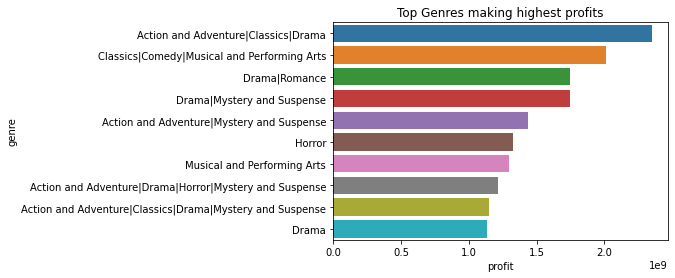

In [245]:
#plot the bargraph and visualize the first highest profits of genres 
sns.barplot(x=genre_profit['profit'],
            y=genre_profit["genre"])
plt.title(s'Top Genres making highest profit')

## Question 2

## what genre runtime is making profit

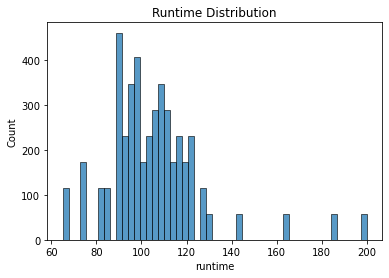

In [251]:
sns.histplot(data = df3, x= 'runtime')
plt.title('Runtime Distribution');

Text(0.5, 1.0, 'Top Genres making highest profits')

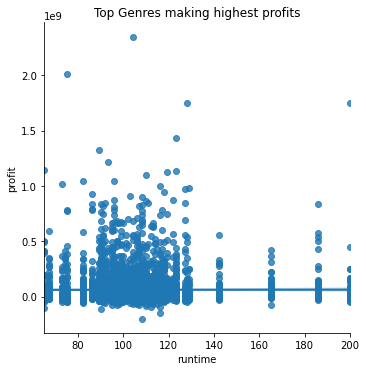

In [256]:
#We see a relationship where time is around 100minutes 
sns.lmplot(x='runtime',
            y="profit", data=df3)
plt.title('Top Genres making highest profits')

# Conclusion
* based on my findings the following sums up my conclusion:
* These are the top 10 genres;
* Classics|Comedy|Musical and Performing Art
* Drama|Romance	
* Drama|Mystery and Suspense	
* Action and Adventure|Mystery and Suspense
* Horror 
* Musical and Performing Arts	
* Action and Adventure|Drama|Horror|Mystery 
* Action and Adventure|Classics|Drama|Mystery 
* Drama


## Recommendation
* The companies should focus on genrws that incurr a high profit, these are:
* Classics|Comedy|Musical and Performing Art
* Drama|Romance	
* Drama|Mystery and Suspense	
* Action and Adventure|Mystery and Suspense

* The genres above incurred a profit. The companies should invest in the genres highlighted above.

